In [89]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from data_load import image_data_loader

In [90]:
X, y = image_data_loader()

In [91]:
len(X)

9279

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

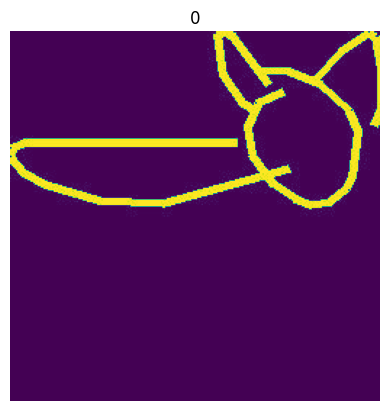

In [93]:
plt.axis('off')
plt.title(y[0])
plt.imshow(X[0])

In [94]:
from sklearn.utils import shuffle

In [95]:
X, y = shuffle(X, y)

In [96]:
def split_to_train_test(data, train_ratio=0.8, test_ratio=0.1):
    SIZE = len(data)
    train = data[:int(SIZE * train_ratio)]
    rest = data[int(SIZE * train_ratio):]
    test = rest[:int(SIZE * test_ratio)]
    val = rest[int(SIZE * test_ratio):]

    print(len(train), len(test), len(val))

    return train, test, val

In [97]:
train_X, test_X, val_X = split_to_train_test(X)

7423 927 929


In [98]:
train_y, test_y, val_y = split_to_train_test(y)


7423 927 929


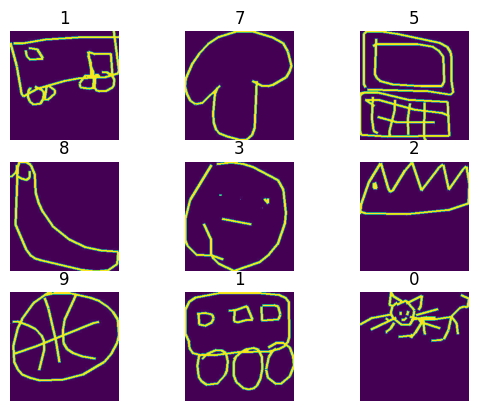

In [99]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(int(train_y[i]))
    plt.imshow(train_X[i]);

In [100]:
import pandas as pd

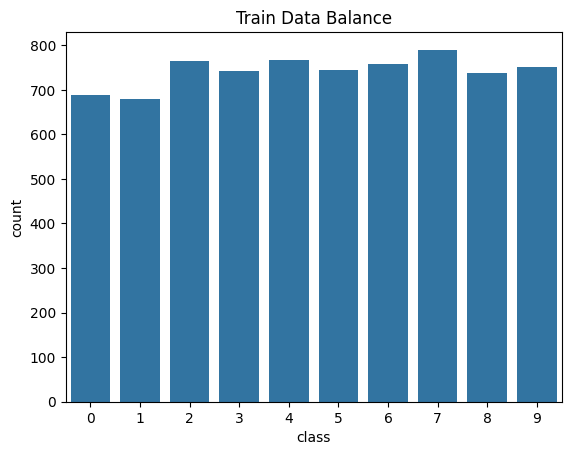

In [101]:
plt.title('Train Data Balance')
classes_df = pd.DataFrame({'class': train_y})
sns.countplot(data=classes_df, x='class');

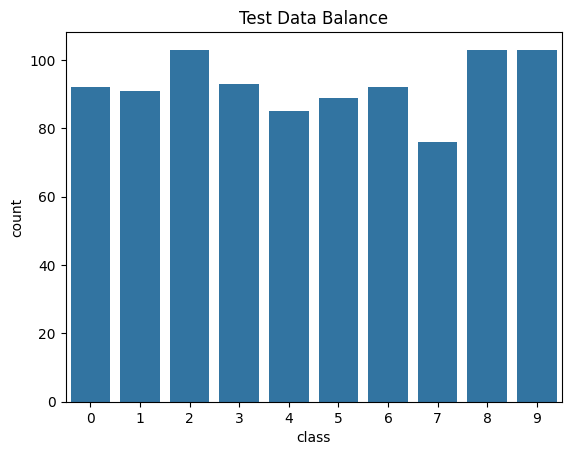

In [102]:
plt.title('Test Data Balance')
classes_df = pd.DataFrame({'class': test_y})
sns.countplot(data=classes_df, x='class');

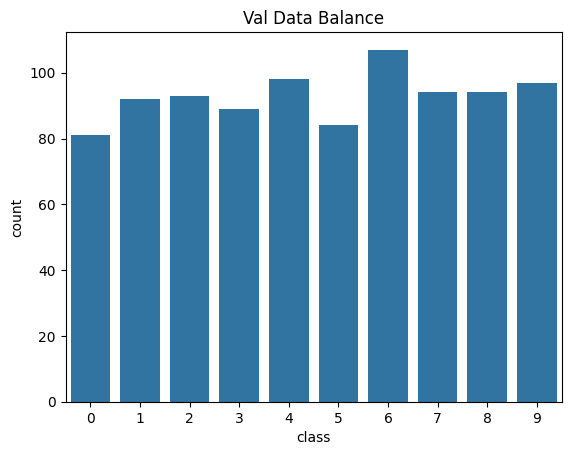

In [103]:
plt.title('Val Data Balance')
classes_df = pd.DataFrame({'class': val_y})
sns.countplot(data=classes_df, x='class');

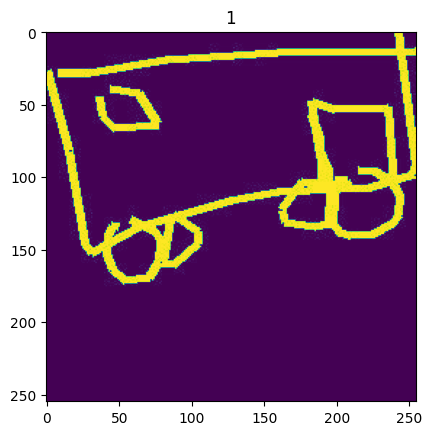

In [104]:
plt.title(train_y[0])
plt.imshow(train_X[0])

# **MODEL**

In [105]:
"""
If your Y
is are one-hot encoded, use categorical_crossentropy.
Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y
is are integers, use sparse_categorical_crossentropy.
Examples for above 3-class classification problem: [1] , [2], [3]
"""

'\nIf your Y\nis are one-hot encoded, use categorical_crossentropy.\nExamples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Y\nis are integers, use sparse_categorical_crossentropy.\nExamples for above 3-class classification problem: [1] , [2], [3]\n'

In [106]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [107]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
train_X.shape

(7423, 255, 255, 1)

In [108]:
input_shape = train_X.shape[1:]
input_shape

(255, 255, 1)

In [109]:
from data_loader import categories

In [110]:
num_classes = len(categories)
num_classes

10

In [133]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(255, 255, 1)),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [134]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 255, 255, 1)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 253, 253, 2)       20        
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 126, 126, 2)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Bat  (None, 126, 126, 2)       8         
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 2)       38        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 2)        

In [135]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [136]:
from tensorflow.keras import callbacks

In [137]:
cbs = [
    callbacks.ModelCheckpoint(
        'model_saves',
        save_weights_only=True
    ),
    callbacks.EarlyStopping(
        patience=5,
        min_delta=0.001
    )
]

In [138]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=15,
    batch_size=128,
    verbose=2,
    callbacks=cbs,
    shuffle=True
)

Epoch 1/15
58/58 - 11s - loss: 1.3761 - accuracy: 0.5716 - val_loss: 2.8106 - val_accuracy: 0.1163 - 11s/epoch - 187ms/step
Epoch 2/15
58/58 - 10s - loss: 0.6162 - accuracy: 0.7923 - val_loss: 3.3038 - val_accuracy: 0.1184 - 10s/epoch - 170ms/step
Epoch 3/15
58/58 - 10s - loss: 0.3646 - accuracy: 0.8786 - val_loss: 3.7955 - val_accuracy: 0.1572 - 10s/epoch - 170ms/step
Epoch 4/15
58/58 - 10s - loss: 0.2454 - accuracy: 0.9194 - val_loss: 3.3790 - val_accuracy: 0.2271 - 10s/epoch - 170ms/step
Epoch 5/15
58/58 - 10s - loss: 0.1683 - accuracy: 0.9438 - val_loss: 2.7700 - val_accuracy: 0.3864 - 10s/epoch - 179ms/step
Epoch 6/15
58/58 - 10s - loss: 0.1120 - accuracy: 0.9624 - val_loss: 2.2049 - val_accuracy: 0.4812 - 10s/epoch - 180ms/step
Epoch 7/15
58/58 - 10s - loss: 0.0878 - accuracy: 0.9701 - val_loss: 1.3512 - val_accuracy: 0.6469 - 10s/epoch - 178ms/step
Epoch 8/15
58/58 - 10s - loss: 0.0904 - accuracy: 0.9696 - val_loss: 0.8257 - val_accuracy: 0.7890 - 10s/epoch - 178ms/step
Epoch 9/

In [139]:
model.evaluate(test_X, test_y)

29/29 [==============================] - 0s 8ms/step - loss: 0.7960 - accuracy: 0.8501


[0.7959815859794617, 0.8500539660453796]

In [140]:
pred = model.predict(test_X)

29/29 [==============================] - 0s 8ms/step


In [141]:
np.argmax(pred[0])

6

In [142]:
test_y[0]

2

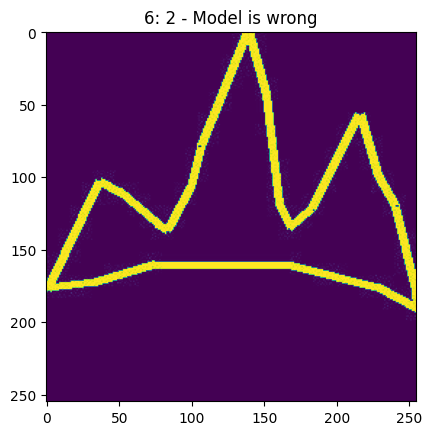

In [143]:
plt.title(f'{np.argmax(pred[0])}: {test_y[0]} - Model is {"right" if np.argmax(pred[0]) == test_y[0] else "wrong"}')
plt.imshow(test_X[0])

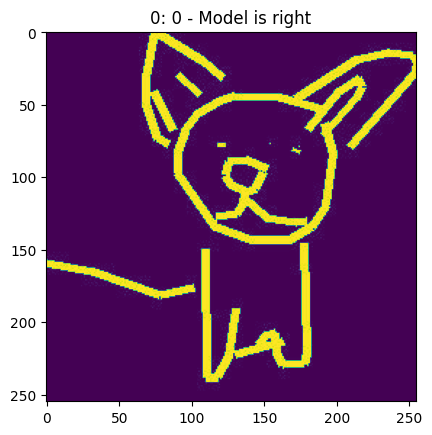

In [144]:
plt.title(f'{np.argmax(pred[1])}: {test_y[1]} - Model is {"right" if np.argmax(pred[1]) == test_y[1] else "wrong"}')
plt.imshow(test_X[1])

In [145]:
def create_model():
    model = Sequential([
        layers.Rescaling(1./255, input_shape=(255, 255, 1)),
        layers.Conv2D(2, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(2, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [146]:
model1 = create_model()
model1.load_weights('model_saves')

In [147]:
model1.evaluate(test_X, test_y)

29/29 [==============================] - 0s 9ms/step - loss: 0.7960 - accuracy: 0.8501


[0.7959815859794617, 0.8500539660453796]

**Sad you can't see my happiness...** <br>
**But now I'm moving one of the stickers to DONE on my kanban board**

In [148]:
import os
from PIL import Image

In [183]:
def user_data(image_path):
    X = []
    img = np.asarray(Image.open(image_path).convert('L'))
    img = np.expand_dims(img, axis=2)
    print(img.shape)
    img = tf.image.resize(img, (255, 255))
    print(img.shape)
    X.append(img)
    plt.imshow(img)
    return X

(529, 570, 1)
(255, 255, 1)


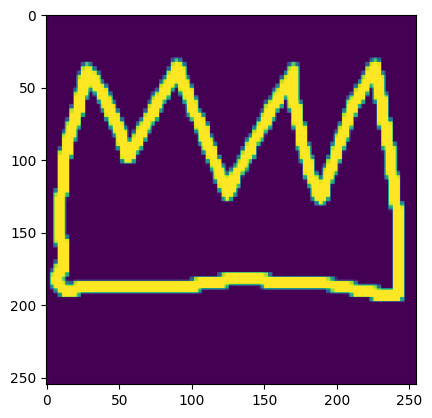

In [184]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Crown.png')

In [185]:
user_img_mr = np.expand_dims(user_img_mr, axis=3)

In [186]:
pred = model1.predict(user_img_mr)

1/1 [==============================] - 0s 18ms/step


In [195]:
user_img_mr[0].shape

(255, 255, 1, 1)

In [187]:
enc = {}
for i in range(len(categories)):
    enc[i] = categories[i]

In [204]:
result = user_img_mr[0, :, :, 0]
result.shape

(255, 255, 1)

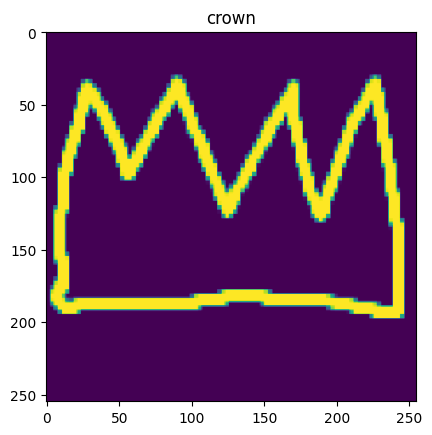

In [205]:
plt.title(enc[np.argmax(pred)])
plt.imshow(result);